In [1]:
from build_data import *
from utils import *
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


<h1> Get data

In [2]:
movies_details = build_movies_details()

In [3]:
movies_details

movie_id                                      title  \
0            1                           Toy Story (1995)   
1            2                           GoldenEye (1995)   
2            3                          Four Rooms (1995)   
3            4                          Get Shorty (1995)   
4            5                             Copycat (1995)   
...        ...                                        ...   
1677      1678                          Mat' i syn (1997)   
1678      1679                           B. Monkey (1998)   
1679      1680                       Sliding Doors (1998)   
1680      1681                        You So Crazy (1994)   
1681      1682  Scream of Stone (Schrei aus Stein) (1991)   

                             genres  \
0     [Animation, Children, Comedy]   
1     [Action, Adventure, Thriller]   
2                        [Thriller]   
3           [Action, Comedy, Drama]   
4          [Crime, Drama, Thriller]   
...                             ...   
1677                        [Drama]   
1678            [Romance, Thriller]   
1679               [Drama, Romance]   
1680                       [Comedy]   
1681                        [Drama]   

                                            movie_brief           director  \
0     A cowboy doll is profoundly threatened and jea...      John Lasseter   
1     Years after a friend and fellow 00 agent is ki...    Martin Campbell   
2     Four interlocking tales that take place in a f...          Directors   
3     A mobster travels to Hollywood to collect a de...   Barry Sonnenfeld   
4     An agoraphobic psychologist and a female detec...          Jon Amiel   
...                                                 ...                ...   
1677  A man goes for a walk through the countryside ...  Aleksandr Sokurov   
1678  A young woman attempts to end her criminal car...    Michael Radford   
1679  A London woman's love life and career both hin...       Peter Howitt   
1680  Stand up comedy by Martin Lawrence, filmed in ...    Thomas Schlamme   
1681  Two famous competitive climbers make a bet on ...      Werner Herzog   

                                                writers  \
0          [John Lasseter, Pete Docter, Andrew Stanton]   
1          [Ian Fleming, Michael France, Jeffrey Caine]   
2     [Allison Anders, Alexandre Rockwell, Robert Ro...   
3                         [Elmore Leonard, Scott Frank]   
4                          [Ann Biderman, David Madsen]   
...                                                 ...   
1677                                     [Yuriy Arabov]   
1678       [Andrew Davies, Chloe King, Michael Radford]   
1679                                     [Peter Howitt]   
1680                                  [Martin Lawrence]   
1681  [Hans-Ulrich Klenner, Walter Saxer, Robert Geo...   

                                                  casts  
0                   [Tom Hanks, Tim Allen, Don Rickles]  
1        [Pierce Brosnan, Sean Bean, Izabella Scorupco]  
2             [Tim Roth, Antonio Banderas, Sammi Davis]  
3              [Gene Hackman, Rene Russo, Danny DeVito]  
4     [Sigourney Weaver, Holly Hunter, Dermot Mulroney]  
...                                                 ...  
1677                 [Aleksei Ananishnov, Gudrun Geyer]  
1678       [Asia Argento, Jared Harris, Rupert Everett]  
1679         [Gwyneth Paltrow, John Hannah, John Lynch]  
1680                                  [Martin Lawrence]  
1681  [Vittorio Mezzogiorno, Stefan Glowacz, Mathild...  

[1682 rows x 7 columns]

<h1> Clean data

In [4]:
movies_details = clean(movies_details)

In [5]:
movies_details

movie_id                                      title  \
0            1                           Toy Story (1995)   
1            2                           GoldenEye (1995)   
2            3                          Four Rooms (1995)   
3            4                          Get Shorty (1995)   
4            5                             Copycat (1995)   
...        ...                                        ...   
1677      1678                          Mat' i syn (1997)   
1678      1679                           B. Monkey (1998)   
1679      1680                       Sliding Doors (1998)   
1680      1681                        You So Crazy (1994)   
1681      1682  Scream of Stone (Schrei aus Stein) (1991)   

                             genres  \
0     [animation, children, comedy]   
1     [action, adventure, thriller]   
2                        [thriller]   
3           [action, comedy, drama]   
4          [crime, drama, thriller]   
...                             ...   
1677                        [drama]   
1678            [romance, thriller]   
1679               [drama, romance]   
1680                       [comedy]   
1681                        [drama]   

                                            movie_brief          director  \
0     [cowboy, doll, profoundli, threaten, jealou, n...      johnlasseter   
1     [year, friend, fellow, 00, agent, kill, joint,...    martincampbell   
2     [four, interlock, tale, take, place, fade, hot...         directors   
3     [mobster, travel, hollywood, collect, debt, di...   barrysonnenfeld   
4     [agoraphob, psychologist, femal, detect, must,...          jonamiel   
...                                                 ...               ...   
1677          [man, goe, walk, countrysid, die, mother]  aleksandrsokurov   
1678  [young, woman, attempt, end, crimin, career, n...    michaelradford   
1679  [london, woman, 's, love, life, career, hing, ...       peterhowitt   
1680  [stand, comedi, martin, lawrenc, film, majest,...    thomasschlamme   
1681  [two, famou, competit, climber, make, bet, cli...      wernerherzog   

                                                writers  \
0             [johnlasseter, petedocter, andrewstanton]   
1             [ianfleming, michaelfrance, jeffreycaine]   
2     [allisonanders, alexandrerockwell, robertrodri...   
3                           [elmoreleonard, scottfrank]   
4                            [annbiderman, davidmadsen]   
...                                                 ...   
1677                                      [yuriyarabov]   
1678          [andrewdavies, chloeking, michaelradford]   
1679                                      [peterhowitt]   
1680                                   [martinlawrence]   
1681  [hans-ulrichklenner, waltersaxer, robertgeoffr...   

                                                  casts  
0                      [tomhanks, timallen, donrickles]  
1           [piercebrosnan, seanbean, izabellascorupco]  
2                [timroth, antoniobanderas, sammidavis]  
3                 [genehackman, renerusso, dannydevito]  
4        [sigourneyweaver, hollyhunter, dermotmulroney]  
...                                                 ...  
1677                   [alekseiananishnov, gudrungeyer]  
1678          [asiaargento, jaredharris, ruperteverett]  
1679            [gwynethpaltrow, johnhannah, johnlynch]  
1680                                   [martinlawrence]  
1681  [vittoriomezzogiorno, stefanglowacz, mathildamay]  

[1682 rows x 7 columns]

In [6]:
def merge_string(x):
    return " ".join(x["genres"]) + " " + " ".join(x["movie_brief"]) + " " + x["director"]+ " " + " ".join(x["writers"]) + " " + " ".join(x["casts"])

movies_details["metadata"] = movies_details.apply(merge_string, axis=1)
s = movies_details.apply(merge_string, axis=1)

In [7]:
movies_details

movie_id                                      title  \
0            1                           Toy Story (1995)   
1            2                           GoldenEye (1995)   
2            3                          Four Rooms (1995)   
3            4                          Get Shorty (1995)   
4            5                             Copycat (1995)   
...        ...                                        ...   
1677      1678                          Mat' i syn (1997)   
1678      1679                           B. Monkey (1998)   
1679      1680                       Sliding Doors (1998)   
1680      1681                        You So Crazy (1994)   
1681      1682  Scream of Stone (Schrei aus Stein) (1991)   

                             genres  \
0     [animation, children, comedy]   
1     [action, adventure, thriller]   
2                        [thriller]   
3           [action, comedy, drama]   
4          [crime, drama, thriller]   
...                             ...   
1677                        [drama]   
1678            [romance, thriller]   
1679               [drama, romance]   
1680                       [comedy]   
1681                        [drama]   

                                            movie_brief          director  \
0     [cowboy, doll, profoundli, threaten, jealou, n...      johnlasseter   
1     [year, friend, fellow, 00, agent, kill, joint,...    martincampbell   
2     [four, interlock, tale, take, place, fade, hot...         directors   
3     [mobster, travel, hollywood, collect, debt, di...   barrysonnenfeld   
4     [agoraphob, psychologist, femal, detect, must,...          jonamiel   
...                                                 ...               ...   
1677          [man, goe, walk, countrysid, die, mother]  aleksandrsokurov   
1678  [young, woman, attempt, end, crimin, career, n...    michaelradford   
1679  [london, woman, 's, love, life, career, hing, ...       peterhowitt   
1680  [stand, comedi, martin, lawrenc, film, majest,...    thomasschlamme   
1681  [two, famou, competit, climber, make, bet, cli...      wernerherzog   

                                                writers  \
0             [johnlasseter, petedocter, andrewstanton]   
1             [ianfleming, michaelfrance, jeffreycaine]   
2     [allisonanders, alexandrerockwell, robertrodri...   
3                           [elmoreleonard, scottfrank]   
4                            [annbiderman, davidmadsen]   
...                                                 ...   
1677                                      [yuriyarabov]   
1678          [andrewdavies, chloeking, michaelradford]   
1679                                      [peterhowitt]   
1680                                   [martinlawrence]   
1681  [hans-ulrichklenner, waltersaxer, robertgeoffr...   

                                                  casts  \
0                      [tomhanks, timallen, donrickles]   
1           [piercebrosnan, seanbean, izabellascorupco]   
2                [timroth, antoniobanderas, sammidavis]   
3                 [genehackman, renerusso, dannydevito]   
4        [sigourneyweaver, hollyhunter, dermotmulroney]   
...                                                 ...   
1677                   [alekseiananishnov, gudrungeyer]   
1678          [asiaargento, jaredharris, ruperteverett]   
1679            [gwynethpaltrow, johnhannah, johnlynch]   
1680                                   [martinlawrence]   
1681  [vittoriomezzogiorno, stefanglowacz, mathildamay]   

                                               metadata  
0     animation children comedy cowboy doll profound...  
1     action adventure thriller year friend fellow 0...  
2     thriller four interlock tale take place fade h...  
3     action comedy drama mobster travel hollywood c...  
4     crime drama thriller agoraphob psychologist fe...  
...                                                 ...  
1677  drama man goe walk countrysid die mother aleks...

<h2> Feature witt CountVectorizer

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(movies_details["metadata"])

In [9]:
count_matrix.toarray().shape

(1682, 11739)

In [10]:
cosine_sim = cosine_similarity(count_matrix)

In [11]:
cosine_sim.shape

(1682, 1682)

In [12]:
movies_details = movies_details.set_index("movie_id")

In [13]:
def get_recommnendation(idx, cosine_sim=cosine_sim):
    
    print(movies_details.loc[idx])
    sim_scores = list(enumerate(cosine_sim[idx], 1))
    
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    sim_scores = sim_scores[1:6]
    
    movie_ids = [i[0] for i in sim_scores]
    
    return movies_details.loc[movie_ids]

In [14]:
get_recommnendation(2, cosine_sim)

title                                           GoldenEye (1995)
genres                             [action, adventure, thriller]
movie_brief    [year, friend, fellow, 00, agent, kill, joint,...
director                                          martincampbell
writers                [ianfleming, michaelfrance, jeffreycaine]
casts                [piercebrosnan, seanbean, izabellascorupco]
metadata       action adventure thriller year friend fellow 0...
Name: 2, dtype: object


title                       genres  \
movie_id                                                      
33            Desperado (1995)  [action, romance, thriller]   
895            Scream 2 (1997)           [horror, thriller]   
288              Scream (1996)           [horror, thriller]   
1020           Gaslight (1944)          [mystery, thriller]   
1073      Shallow Grave (1994)                   [thriller]   

                                                movie_brief         director  \
movie_id                                                                       
33        [former, musician, gunsling, el, mariachi, arr...  robertrodriguez   
895       [two, year, first, seri, murder, sidney, accli...        wescraven   
288       [year, murder, mother, teenag, girl, terror, n...        wescraven   
1020      [ten, year, aunt, murder, london, home, woman,...      georgecukor   
1073      [three, friend, discov, new, flatmat, dead, lo...       dannyboyle   

                                                  writers  \
movie_id                                                    
33                                      [robertrodriguez]   
895                                     [kevinwilliamson]   
288                                     [kevinwilliamson]   
1020      [johnvandruten, walterreisch, johnl.balderston]   
1073                                          [johnhodge]   

                                                    casts  \
movie_id                                                    
33        [antoniobanderas, salmahayek, joaquimdealmeida]   
895           [nevecampbell, courteneycox, davidarquette]   
288           [nevecampbell, courteneycox, davidarquette]   
1020          [charlesboyer, ingridbergman, josephcotten]   
1073       [kerryfox, christophereccleston, ewanmcgregor]   

                                                   metadata  
movie_id                                                     
33        action romance thriller former musician gunsli...  
895       horror thriller two year first seri murder sid...  
288       horror thriller year murder mother teenag girl...  
1020      mystery thriller ten year aunt murder london h...  
1073      thriller three friend discov new flatmat dead ...

<h2> Feature with TD-IDF

In [15]:
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(s)
print(feature_vectors.toarray().shape)

(1682, 11869)


In [16]:
similarity = cosine_similarity(feature_vectors)
print(similarity.shape)

(1682, 1682)


In [17]:
get_recommnendation(42,similarity)

title                                              Clerks (1994)
genres                                                  [comedy]
movie_brief    [day, live, two, conveni, clerk, name, dant, r...
director                                              kevinsmith
writers                                             [kevinsmith]
casts          [briano'halloran, jeffanderson, marilynghiglio...
metadata       comedy day live two conveni clerk name dant ra...
Name: 42, dtype: object


title                         genres  \
movie_id                                                          
804       Jimmy Hollywood (1994)                       [comedy]   
628              Sleepers (1996)                 [crime, drama]   
355                Sphere (1998)  [adventure, sci-fi, thriller]   
1510         Mad Dog Time (1996)                        [crime]   
1522        Trial by Jury (1994)                     [thriller]   

                                                movie_brief       director  \
movie_id                                                                     
804       [fail, actor, live, crime, infest, lo, angel, ...  barrylevinson   
628       [prank, goe, disastr, wrong, group, boy, sent,...  barrylevinson   
355       [spaceship, discov, three, hundr, year, ', wor...  barrylevinson   
1510      [boss, madhous, mobster, temporari, boss, crim...    larrybishop   
1522      [valeri, juror, trial, mob, boss, young, son, ...   heywoodgould   

                                               writers  \
movie_id                                                 
804                                    [barrylevinson]   
628                 [lorenzocarcaterra, barrylevinson]   
355       [michaelcrichton, kurtwimmer, stephenhauser]   
1510                                     [larrybishop]   
1522                        [jordankatz, heywoodgould]   

                                                  casts  \
movie_id                                                  
804          [joepesci, christianslater, victoriaabril]   
628                [robertdeniro, kevinbacon, bradpitt]   
355       [dustinhoffman, sharonstone, samuell.jackson]   
1510       [michaelj.pollard, henrysilva, gabrielbyrne]   
1522       [joannewhalley, armandassante, gabrielbyrne]   

                                                   metadata  
movie_id                                                     
804       comedy fail actor live crime infest lo angel f...  
628       crime drama prank goe disastr wrong group boy ...  
355       adventure sci-fi thriller spaceship discov thr...  
1510      crime boss madhous mobster temporari boss crim...  
1522      thriller valeri juror trial mob boss young son...

<h2> Using Ridge Regression

In [7]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso
import math
import pandas as pd
import time
class CB_LN():
  ## Initializing the user-movie rating matrix
    def __init__(self, features, users, train_data, model, test_data):
        self.features = features 
        self.users = users
        self.train_data = train_data
        self.model = model
        self.test_data = test_data
        self.n_users = users.shape[0]

    def train(self, train_data, valid_data, alpha = None, fit_intercept=True):
        start_time = time.time()
        d = self.features.shape[1] # data dimension
        
        ## initializing W and b
        W = np.zeros((d, self.n_users))
        b = np.zeros((1, self.n_users))

        for n in range(self.n_users):    
            ids, scores = self.get_items_rated_by_user(train_data, n)
            if alpha:
                clf = self.model(alpha=alpha, fit_intercept=fit_intercept)
            else:
                clf = self.model(fit_intercept=fit_intercept)
            Xhat = self.features[ids, :]
    
            clf.fit(Xhat, scores) 
            W[:, n] = clf.coef_
            b[0, n] = clf.intercept_

        Yhat = self.features.dot(W) + b
        loss_train = self.evaluate(Yhat, train_data)
        loss_valid = self.evaluate(Yhat, valid_data)
        t = time.time() - start_time
        return (Yhat, loss_train, loss_valid, t)

    ### RMSE calculate
    def evaluate(self,Yhat, rates):
        se = 0
        cnt = 0
        for n in range(self.n_users):
            ids, scores_truth = self.get_items_rated_by_user(rates, n)
            scores_pred = Yhat[ids, n]
            e = scores_truth - scores_pred 
            se += (e*e).sum(axis = 0)
            cnt += e.size 
        return math.sqrt(se/cnt)
  
    def get_items_rated_by_user(self,rate_matrix, user_id):
        y = rate_matrix[:,0] # all users
        # item indices rated by user_id
        # we need to +1 to user_id since in the rate_matrix, id starts from 1 
        # but id in python starts from 0
        ids = np.where(y == user_id +1)[0] 
        item_ids = rate_matrix[ids, 1] - 1 # index starts from 0 
        scores = rate_matrix[ids, 2]
        return (item_ids, scores)


In [ ]:
## Stratified sampling
all_train_data, train_data, valid_data, test_data = split_dataset()

In [21]:
vectorizer = TfidfVectorizer()
movies_details["genres"] = movies_details["genres"].apply(lambda x: " ".join(x))
feature_vectors = vectorizer.fit_transform(movies_details["genres"])
print(feature_vectors.toarray().shape)

(1682, 21)


In [22]:
users = get_users()

In [33]:
cb_ridge = CB_LN(feature_vectors, users, all_train_data, Ridge, test_data)

In [34]:
cb_ridge.train(train_data, valid_data)

(array([[2.5465727 , 3.11167606, 2.63835258, ..., 4.03846941, 4.26668108,
         2.78258869],
        [3.00501764, 4.11123653, 2.9585503 , ..., 3.8306741 , 4.55740906,
         3.68379499],
        [3.25095212, 3.70513936, 2.29739031, ..., 4.12710737, 4.12039178,
         3.66391812],
        ...,
        [4.52259086, 4.15318671, 3.30157445, ..., 4.29677144, 4.61211077,
         3.37115391],
        [3.45554618, 3.97665575, 2.22912352, ..., 3.99941582, 3.52928655,
         2.52937247],
        [4.26991841, 3.81546421, 2.84173354, ..., 4.02837883, 4.49538421,
         4.1130458 ]]),
 0.9035750309730914,
 1.0512161299697307,
 1.6749083995819092)

In [40]:
alphas = np.arange(1, 30, 1)
df = dict({"alpha": [], "train_loss": [], "valid_loss": [], "time": []})

for alpha in alphas:
    Y, train_loss, valid_loss, t = cb_ridge.train(train_data, valid_data, alpha=alpha)
    df["alpha"].append(alpha)
    df["train_loss"].append(train_loss)
    df["valid_loss"].append(valid_loss)
    df["time"].append(t)
df = pd.DataFrame(df)
df

alpha  train_loss  valid_loss      time
0       1    0.903575    1.051216  1.665846
1       2    0.918860    1.039348  1.382033
2       3    0.929447    1.034357  1.333970
3       4    0.937495    1.031775  1.284343
4       5    0.943941    1.030328  1.269491
5       6    0.949281    1.029498  1.253958
6       7    0.953813    1.029037  1.254075
7       8    0.957731    1.028802  1.221908
8       9    0.961166    1.028718  1.325433
9      10    0.964212    1.028734  1.199411
10     11    0.966939    1.028819  1.237292
11     12    0.969400    1.028952  1.207959
12     13    0.971636    1.029117  1.442135
13     14    0.973679    1.029302  1.157791
14     15    0.975557    1.029504  1.494875
15     16    0.977289    1.029714  1.464003
16     17    0.978895    1.029931  1.392536
17     18    0.980387    1.030150  1.208472
18     19    0.981780    1.030370  1.230123
19     20    0.983084    1.030589  1.446413
20     21    0.984307    1.030806  1.310847
21     22    0.985457    1.031021  1.283640
22     23    0.986541    1.031232  1.178153
23     24    0.987566    1.031440  1.170504
24     25    0.988536    1.031643  1.191021
25     26    0.989455    1.031842  1.194433
26     27    0.990329    1.032037  1.233386
27     28    0.991160    1.032228  1.233476
28     29    0.991951    1.032415  1.198193

In [38]:
df = df.set_index("alpha")

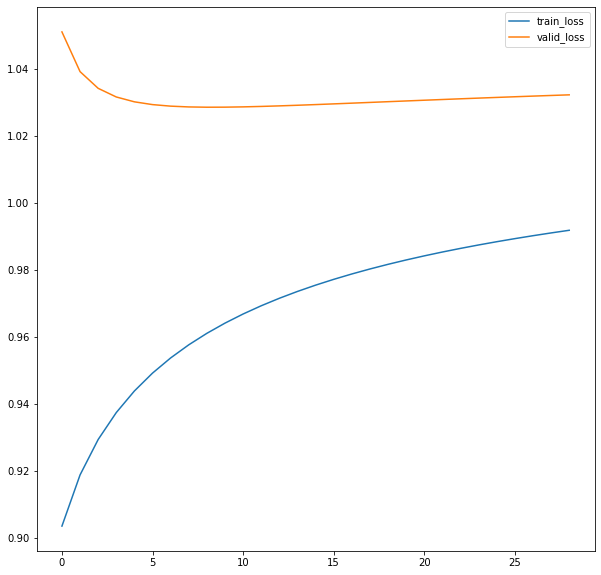

In [41]:
df = df[["train_loss", "valid_loss"]].plot(figsize=(10, 10))

In [42]:
cb_ridge.train(all_train_data, test_data, alpha=8)

(array([[2.97783753, 3.52731501, 2.66219863, ..., 4.13387306, 4.25300604,
         3.08793798],
        [3.04835403, 3.64935807, 2.66935172, ..., 3.96331153, 4.25486811,
         3.74814514],
        [3.54711704, 3.47066938, 2.4678138 , ..., 4.0152054 , 4.08410017,
         3.76474564],
        ...,
        [4.09183236, 3.99401979, 2.89338266, ..., 4.07138254, 4.43484286,
         3.49695299],
        [3.57510546, 3.75922123, 2.51200069, ..., 4.05943847, 3.98083932,
         2.85682175],
        [4.09250735, 3.76409228, 2.76791849, ..., 4.03301633, 4.4060996 ,
         3.81627154]]),
 0.9623232092593996,
 1.0202035740552848,
 1.456425428390503)